In [1]:
import sys
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

print( f"Python {sys.version}\nPandas {pd.__version__}\nNumPy {np.__version__}\nMatplotlib {mpl.__version__}\n" ) 

Python 3.9.13 (main, Aug 25 2022, 18:29:29) 
[Clang 12.0.0 ]
Pandas 1.5.0
NumPy 1.23.5
Matplotlib 3.5.2



<h3>STEP 1</h3> 

- Clean DATA
- EDA

In [2]:
df = pd.read_csv('supermarket.csv')
df.head()

,SHOP_WEEK,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,PROD_CODE,PROD_CODE_10,PROD_CODE_20,PROD_CODE_30,...,CUST_PRICE_SENSITIVITY,CUST_LIFESTAGE,BASKET_ID,BASKET_SIZE,BASKET_PRICE_SENSITIVITY,BASKET_TYPE,BASKET_DOMINANT_MISSION,STORE_CODE,STORE_FORMAT,STORE_REGION
0,200734,20071019,6,8,1,9.50,PRD0901335,CL00058,DEP00016,G00006,...,XX,OT,994108000679877,M,MM,Small Shop,Fresh,STORE00001,LS,E02
1,200805,20080328,6,21,1,1.49,PRD0901120,CL00162,DEP00055,G00016,...,XX,NaN,994110300629787,S,MM,Small Shop,Fresh,STORE00001,LS,E02
2,200716,20070612,3,9,1,0.86,PRD0900963,CL00248,DEP00089,G00030,...,NaN,NaN,994106200026009,S,MM,Small Shop,Grocery,STORE00001,LS,E02
3,200815,20080604,4,10,3,0.90,PRD0901055,CL00248,DEP00089,G00030,...,NaN,NaN,994111300076346,L,MM,Top Up,Grocery,STORE00001,LS,E02
4,200626,20060824,5,16,1,1.77,PRD0901877,CL00169,DEP00056,G00017,...,NaN,NaN,994102000065854,L,LA,Top Up,Fresh,STORE00001,LS,E02


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578082 entries, 0 to 578081
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SHOP_WEEK                 578082 non-null  int64  
 1   SHOP_DATE                 578082 non-null  int64  
 2   SHOP_WEEKDAY              578082 non-null  int64  
 3   SHOP_HOUR                 578082 non-null  int64  
 4   QUANTITY                  578082 non-null  int64  
 5   SPEND                     578082 non-null  float64
 6   PROD_CODE                 578082 non-null  object 
 7   PROD_CODE_10              578082 non-null  object 
 8   PROD_CODE_20              578082 non-null  object 
 9   PROD_CODE_30              578082 non-null  object 
 10  PROD_CODE_40              578082 non-null  object 
 11  CUST_CODE                 492494 non-null  object 
 12  CUST_PRICE_SENSITIVITY    492494 non-null  object 
 13  CUST_LIFESTAGE            433142 non-null  o

In [68]:
for i in df['BASKET_TYPE'].unique() :
    print(f'{i}')

Small Shop
Top Up
Full Shop
XX


- Clean DATA

In [5]:
def week(x):
    x = str(x)[:4]+'-'+str(x)[4:]
    return x

df['SHOP_DATE'] = pd.to_datetime(df['SHOP_DATE'], format='%Y%m%d')
df['SHOP_WEEK'] = df['SHOP_WEEK'].apply(week)

df.head()

,SHOP_WEEK,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,PROD_CODE,PROD_CODE_10,PROD_CODE_20,PROD_CODE_30,...,CUST_PRICE_SENSITIVITY,CUST_LIFESTAGE,BASKET_ID,BASKET_SIZE,BASKET_PRICE_SENSITIVITY,BASKET_TYPE,BASKET_DOMINANT_MISSION,STORE_CODE,STORE_FORMAT,STORE_REGION
0,2007-34,2007-10-19,6,8,1,9.50,PRD0901335,CL00058,DEP00016,G00006,...,XX,OT,994108000679877,M,MM,Small Shop,Fresh,STORE00001,LS,E02
1,2008-05,2008-03-28,6,21,1,1.49,PRD0901120,CL00162,DEP00055,G00016,...,XX,NaN,994110300629787,S,MM,Small Shop,Fresh,STORE00001,LS,E02
2,2007-16,2007-06-12,3,9,1,0.86,PRD0900963,CL00248,DEP00089,G00030,...,NaN,NaN,994106200026009,S,MM,Small Shop,Grocery,STORE00001,LS,E02
3,2008-15,2008-06-04,4,10,3,0.90,PRD0901055,CL00248,DEP00089,G00030,...,NaN,NaN,994111300076346,L,MM,Top Up,Grocery,STORE00001,LS,E02
4,2006-26,2006-08-24,5,16,1,1.77,PRD0901877,CL00169,DEP00056,G00017,...,NaN,NaN,994102000065854,L,LA,Top Up,Fresh,STORE00001,LS,E02


In [6]:
# Fill NaN

df['CUST_CODE'] = df['CUST_CODE'].fillna('XX')
df['CUST_LIFESTAGE'] = df['CUST_LIFESTAGE'].fillna('XX')
df.head()

,SHOP_WEEK,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,PROD_CODE,PROD_CODE_10,PROD_CODE_20,PROD_CODE_30,...,CUST_PRICE_SENSITIVITY,CUST_LIFESTAGE,BASKET_ID,BASKET_SIZE,BASKET_PRICE_SENSITIVITY,BASKET_TYPE,BASKET_DOMINANT_MISSION,STORE_CODE,STORE_FORMAT,STORE_REGION
0,2007-34,2007-10-19,6,8,1,9.50,PRD0901335,CL00058,DEP00016,G00006,...,XX,OT,994108000679877,M,MM,Small Shop,Fresh,STORE00001,LS,E02
1,2008-05,2008-03-28,6,21,1,1.49,PRD0901120,CL00162,DEP00055,G00016,...,XX,XX,994110300629787,S,MM,Small Shop,Fresh,STORE00001,LS,E02
2,2007-16,2007-06-12,3,9,1,0.86,PRD0900963,CL00248,DEP00089,G00030,...,NaN,XX,994106200026009,S,MM,Small Shop,Grocery,STORE00001,LS,E02
3,2008-15,2008-06-04,4,10,3,0.90,PRD0901055,CL00248,DEP00089,G00030,...,NaN,XX,994111300076346,L,MM,Top Up,Grocery,STORE00001,LS,E02
4,2006-26,2006-08-24,5,16,1,1.77,PRD0901877,CL00169,DEP00056,G00017,...,NaN,XX,994102000065854,L,LA,Top Up,Fresh,STORE00001,LS,E02


In [19]:
# add column

df['total_sales'] = df['SPEND']*df['QUANTITY']


In [69]:
## Create customer single view ##

# import datetime as dt

newdf = pd.DataFrame( df['CUST_CODE'].unique() ).rename(columns={0:'cust_id'})

totalspend = pd.DataFrame(df.groupby(by=['CUST_CODE'],group_keys=True)
                          .apply( lambda x: sum(x['total_sales']) )
                          ).rename(columns={0:'total_spend'})

tm = pd.DataFrame(df.groupby(by=['CUST_CODE', 
                                 pd.Grouper(key='SHOP_DATE', freq='3M')])['total_sales']
                                 .agg('sum')
                  ).groupby('CUST_CODE').agg('mean').rename(columns={'total_sales':'total_av_3m'})

sm = pd.DataFrame(df.groupby(by=['CUST_CODE', 
                                 pd.Grouper(key='SHOP_DATE', freq='6M')])['total_sales']
                                 .agg('sum')
                  ).groupby('CUST_CODE').agg('mean').rename(columns={'total_sales':'total_av_6m'})

yearly = pd.DataFrame( df.groupby(by=['CUST_CODE', 
                                      pd.Grouper(key='SHOP_DATE', freq='Y')])['total_sales']
                                      .agg('sum')
                  ).groupby('CUST_CODE').agg('mean').rename(columns={'total_sales':'total_av_12m'})

sku = pd.DataFrame(df.groupby(by=['CUST_CODE'])
                   .apply( 
                       lambda x : round( (len(x['PROD_CODE'].unique())/(df['PROD_CODE'].nunique()))*100
                                        , 2 )
                       )
                            ).rename(columns={0:'sku_penetrate(%)'})

bsksize = pd.DataFrame(df.groupby(by=['CUST_CODE'])['BASKET_SIZE']
                       .apply(lambda x : x.mode())
                          ).rename(columns={'BASKET_SIZE':'most_basket_size'})

bsksize_sense = pd.DataFrame(df.groupby(by=['CUST_CODE'])['BASKET_PRICE_SENSITIVITY']
                       .apply(lambda x : x.mode())
                          ).rename(columns={'BASKET_PRICE_SENSITIVITY':'most_basket_price_sensitivity'})

bsksize_cat = pd.DataFrame(df.groupby(by=['CUST_CODE'])['BASKET_DOMINANT_MISSION']
                       .apply(lambda x : x.mode())
                          ).rename(columns={'BASKET_DOMINANT_MISSION':'most_category'})

bsk_type = pd.DataFrame(df.groupby(by=['CUST_CODE'])['BASKET_TYPE']
                       .apply(lambda x : x.mode())
                          ).rename(columns={'BASKET_TYPE':'most_basket_type'})

weekday = pd.DataFrame(df.groupby(by=['CUST_CODE'])['SHOP_WEEKDAY']
                       .apply(lambda x : x.mode())
                          ).rename(columns={'SHOP_WEEKDAY':'most_weekday'})

hourr = pd.DataFrame(df.groupby(by=['CUST_CODE'])['SHOP_HOUR']
                       .apply(lambda x : x.mode())
                          ).rename(columns={'SHOP_HOUR':'most_coming_time'})

# JOIN them together

ls = [totalspend,tm,sm,yearly,sku,bsksize,bsk_type,bsksize_sense,bsksize_cat,weekday,hourr]
for i in (ls):
    newdf = pd.merge( newdf,i,left_on=['cust_id'],right_on=['CUST_CODE'] )

newdf

,cust_id,total_spend,total_av_3m,total_av_6m,total_av_12m,sku_penetrate(%),most_basket_size,most_basket_type,most_basket_price_sensitivity,most_category,most_weekday,most_coming_time
0,CUST0000804514,20.23,20.23,20.23,20.23,0.12,M,Small Shop,MM,Fresh,6,8
1,CUST0000735558,12.30,12.30,12.30,12.30,0.08,S,Small Shop,MM,Fresh,3,16
2,CUST0000735558,12.30,12.30,12.30,12.30,0.08,S,Small Shop,MM,Fresh,3,21
3,CUST0000735558,12.30,12.30,12.30,12.30,0.08,S,Small Shop,MM,Fresh,6,16
4,CUST0000735558,12.30,12.30,12.30,12.30,0.08,S,Small Shop,MM,Fresh,6,21
...,...,...,...,...,...,...,...,...,...,...,...,...
5224,CUST0000937752,0.75,0.75,0.75,0.75,0.02,S,Small Shop,LA,Fresh,3,17
5225,CUST0000278162,2.00,2.00,2.00,2.00,0.04,S,Small Shop,MM,Mixed,5,16
5226,CUST0000352552,0.63,0.63,0.63,0.63,0.02,S,Small Shop,MM,Grocery,2,13
5227,CUST0000218304,1.54,1.54,1.54,1.54,0.02,S,Small Shop,MM,Fresh,5,19


</h3>PLOT</h3>

In [7]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(x=df['total_sales'], y=df['total_sales'])
ax.set_xlabel(r'x', fontsize=14)
ax.set_ylabel(r'y', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

SyntaxError: invalid syntax (1979342993.py, line 2)

In [9]:
# from sklearn.preprocessing import LabelEncoder  

# enc = ['CUST_CODE','PROD_CODE','PROD_CODE_10','PROD_CODE_20','PROD_CODE_30','PROD_CODE_40','BASKET_SIZE',
#        'BASKET_TYPE','BASKET_PRICE_SENSITIVITY','BASKET_DOMINANT_MISSION']

# le = LabelEncoder()
# for i in enc :
#     df[i] = le.fit_transform(df[i])
# df

,CUST_CODE,total_sales,SHOP_DATE,SHOP_HOUR,PROD_CODE,PROD_CODE_10,PROD_CODE_20,PROD_CODE_30,PROD_CODE_40,BASKET_ID,BASKET_SIZE,BASKET_TYPE,BASKET_PRICE_SENSITIVITY,BASKET_DOMINANT_MISSION
0,2728,9.50,20071019,8,1323,56,15,5,1,994108000679877,1,1,1,0
1,2505,1.49,20080328,21,1109,160,54,15,2,994110300629787,2,1,1,0
2,3439,0.86,20070612,9,952,246,88,29,8,994106200026009,2,1,1,1
3,3439,2.70,20080604,10,1044,246,88,29,8,994111300076346,0,2,1,1
4,3439,1.77,20060824,16,1856,167,55,16,3,994102000065854,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578077,1532,0.01,20071116,12,3635,220,75,22,4,994108400460274,2,1,1,1
578078,3255,13.76,20070612,12,2283,228,80,26,7,994106200802520,0,2,2,0
578079,343,4.47,20061109,16,389,227,80,26,7,994103100229855,0,0,1,2
578080,1396,4.92,20070624,10,3032,227,80,26,7,994106300437841,0,0,1,2


In [10]:
#pip install yellowbrick

In [13]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer

# fig, ax = plt.subplots(3, 2, figsize=(15,8))
# for i in [2, 3, 4, 5]:
#     '''
#     Create KMeans instances for different number of clusters
#     '''
#     km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
#     q, mod = divmod(i, 2)
#     '''
#     Create SilhouetteVisualizer instance with KMeans instance
#     Fit the visualizer
#     '''
#     visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
#     visualizer.fit(df)


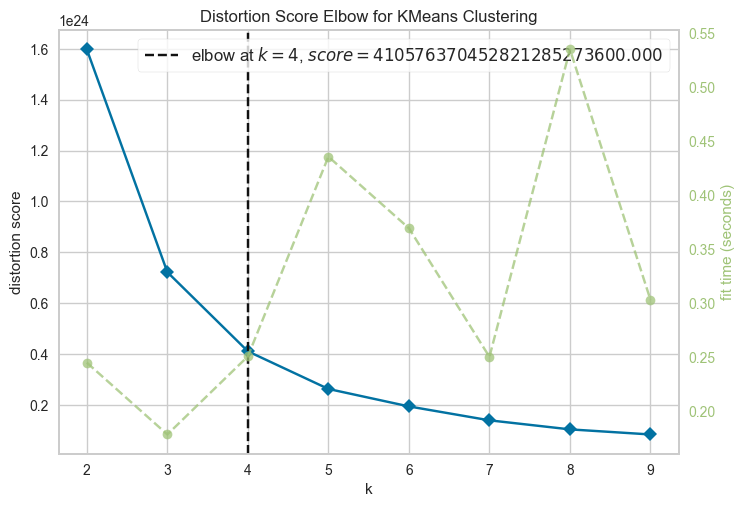

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [16]:
km = KMeans(random_state=42, n_init="auto")
visualizer = KElbowVisualizer(km, k=(2,10))
 
visualizer.fit(df)
visualizer.show() 

In [17]:
kmodel = KMeans(n_clusters=4, random_state=0, n_init="auto")
kmodel.fit(df)

df["clusters"] = kmodel.labels_

df.head()

,CUST_CODE,total_sales,SHOP_DATE,SHOP_HOUR,PROD_CODE,PROD_CODE_10,PROD_CODE_20,PROD_CODE_30,PROD_CODE_40,BASKET_ID,BASKET_SIZE,BASKET_TYPE,BASKET_PRICE_SENSITIVITY,BASKET_DOMINANT_MISSION,clusters
0,2728,9.50,20071019,8,1323,56,15,5,1,994108000679877,1,1,1,0,2
1,2505,1.49,20080328,21,1109,160,54,15,2,994110300629787,2,1,1,0,3
2,3439,0.86,20070612,9,952,246,88,29,8,994106200026009,2,1,1,1,0
3,3439,2.70,20080604,10,1044,246,88,29,8,994111300076346,0,2,1,1,3
4,3439,1.77,20060824,16,1856,167,55,16,3,994102000065854,0,2,0,0,1


In [18]:
# plt.scatter(df["total_sales"], 
#             df["SHOP_HOUR"], 
#             c = df["clusters"])